# 4x4 Grid

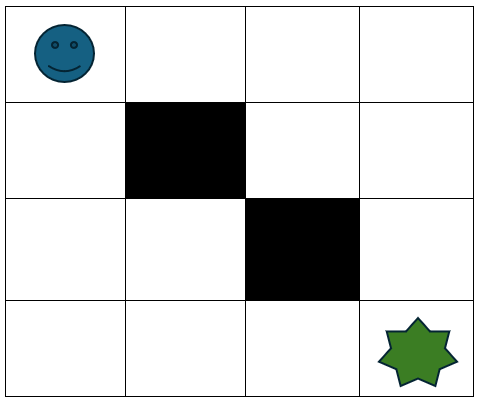

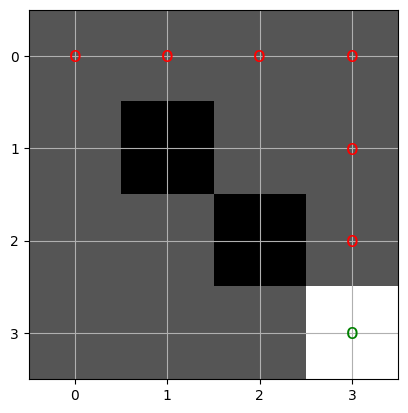

In [1]:
# Import necessary libraries
import numpy as np  # For numerical operations and handling arrays
import random  # For generating random actions during training
import matplotlib.pyplot as plt  # For visualizing the grid and path

# Setting up the grid
grid_size = 4  # Define the grid size (4x4)
goal = (3, 3)  # Define the goal position
obstacles = [(1, 1), (2, 2)]  # Define obstacle positions

# Define actions and initialize Q-table
# Q table is important for the learning process of the agient, it will record all the action and the reward to train the model.
# Q table is for to take the best possible action based on the expected reward for each state in the environment.
actions = ['Up', 'Down', 'LEFT', 'RIGHT']
Q = np.zeros((grid_size, grid_size, len(actions)))  # Initialize Q-table

# Define submarine movement function based on actions
def move(state, action):
    moves = {
        'Up': (-1, 0),  # Move up (decrease row index)
        'Down': (1, 0),  # Move down (increase row index)
        'LEFT': (0, -1),  # Move left (decrease column index)
        'RIGHT': (0, 1),  # Move right (increase column index)
    }
    new_state = (state[0] + moves[action][0], state[1] + moves[action][1])  # Compute new state
    # Ensure new state is within grid boundaries and not an obstacle
    return new_state if 0 <= new_state[0] < grid_size and 0 <= new_state[1] < grid_size and new_state not in obstacles else state

# Training the model with epsilon-greedy strategy
epsilon = 0.1  # 10% chance to explore a random action
alpha = 0.5  # Learning rate
gamma = 0.9  # Discount factor
num_episodes = 50  # Reduce the number of episodes

for _ in range(num_episodes):
    state = (0, 0)
    while state != goal:
        if random.uniform(0, 1) < epsilon:
            action = random.choice(actions)  # Explore: Random action
        else:
            action = actions[np.argmax(Q[state])]  # Exploit: Best action from Q-table

        new_state = move(state, action)
        reward = 10 if new_state == goal else (-5 if new_state in obstacles else -1)

        # Q-learning formula
        Q[state][actions.index(action)] += alpha * (reward + gamma * np.max(Q[new_state]) - Q[state][actions.index(action)])
        state = new_state

# Testing with optimal path
state, path = (0, 0), [(0, 0)]
while state != goal:
    action = actions[np.argmax(Q[state])]
    new_state = move(state, action)
    path.append(new_state)  # Append new state, not old state
    state = new_state  # Update state

# Draw the path
grid = np.zeros((grid_size, grid_size))
for oba in obstacles:
    grid[oba] = -1
grid[goal] = 2

plt.imshow(grid, cmap='gray', origin="upper")
for (x, y) in path:
    plt.text(y, x, "o", ha="center", va="center", fontsize=15, color="red" if (x, y) != goal else "green")

plt.xticks(range(grid_size))
plt.yticks(range(grid_size))
plt.grid(True)
plt.show()

# 5x5 Grid

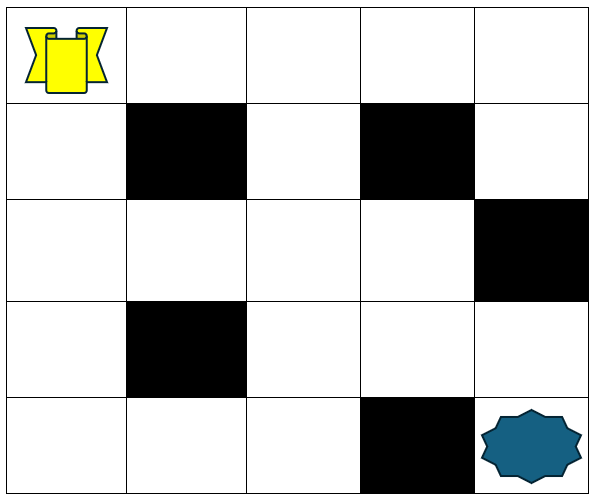

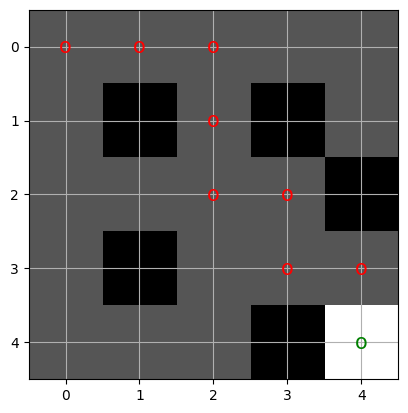

In [2]:
# Import necessary libraries
import numpy as np  # For numerical operations and handling arrays
import random  # For generating random actions during training
import matplotlib.pyplot as plt  # For visualizing the grid and path

# Setting up the grid
grid_size = 5
goal = (4, 4)
obstacles = [(1,1),(1,3),(2,4),(3,1),(4,3)]

# Define actions and initialize Q-table
actions = ['Up', 'Down', 'LEFT', 'RIGHT']
Q = np.zeros((grid_size, grid_size, len(actions)))  # Initialize Q-table

# Define movement function
def move(state, action):
    moves = {
        'Up': (-1, 0),
        'Down': (1, 0),
        'LEFT': (0, -1),
        'RIGHT': (0, 1),
    }
    new_state = (state[0] + moves[action][0], state[1] + moves[action][1])
    return new_state if 0 <= new_state[0] < grid_size and 0 <= new_state[1] < grid_size and new_state not in obstacles else state

# Training the model with epsilon-greedy strategy
epsilon = 0.1  # 10% chance to explore a random action
alpha = 0.5  # Learning rate
gamma = 0.9  # Discount factor
num_episodes = 50  # Reduce the number of episodes

for _ in range(num_episodes):
    state = (0, 0)
    while state != goal:
        if random.uniform(0, 1) < epsilon:
            action = random.choice(actions)  # Explore: Random action
        else:
            action = actions[np.argmax(Q[state])]  # Exploit: Best action from Q-table

        new_state = move(state, action)
        reward = 10 if new_state == goal else (-5 if new_state in obstacles else -1)

        # Q-learning formula
        Q[state][actions.index(action)] += alpha * (reward + gamma * np.max(Q[new_state]) - Q[state][actions.index(action)])
        state = new_state

# Testing with optimal path
state, path = (0, 0), [(0, 0)]
while state != goal:
    action = actions[np.argmax(Q[state])]
    new_state = move(state, action)
    path.append(new_state)  # Append new state, not old state
    state = new_state  # Update state

# Draw the path
grid = np.zeros((grid_size, grid_size))
for oba in obstacles:
    grid[oba] = -1
grid[goal] = 2

plt.imshow(grid, cmap='gray', origin="upper")
for (x, y) in path:
    plt.text(y, x, "o", ha="center", va="center", fontsize=15, color="red" if (x, y) != goal else "green")

plt.xticks(range(grid_size))
plt.yticks(range(grid_size))
plt.grid(True)
plt.show()